**LETS GROW MORE INTERNSHIP - AUGUST 2023**\
**NINAD NILESH SUGANDHI**\
**IRIS CLASSIFICATION USING DECISION TREE**

Importing all necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import sklearn
import scipy
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import warnings
from sklearn import tree
import scikitplot as skplt
import yellowbrick as yb

Printing the current version of all libraries used

In [9]:
print('''Pandas version is: {0}
Numpy version is: {1}
Scipy version is: {2}
Matplotlib version is: {3}
Seaborn version is: {4}
Scikit-learn version is: {5}'''.format(pd.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__, sklearn.__version__))

Pandas version is: 1.5.3
Numpy version is: 1.23.5
Scipy version is: 1.10.0
Matplotlib version is: 3.7.0
Seaborn version is: 0.12.2
Scikit-learn version is: 1.2.1


**Loading Data**\
*Printing first 5 entries of data*

In [10]:
data1 = pd.read_csv('D:\\NINAD SUGANDHI\\GOOGLE COLAB\\LGM PROJECTS\\IRIS.csv')                         #loads data, comma seperated files
data1.columns = ['ID', 'sepal length', 'sepal width', 'Petal length', 'Petal width', 'species']    #setting column names
data1.head()                                                                                            #shows first 5 rows from the datset table

,ID,sepal length,sepal width,Petal length,Petal width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Preprocessing**

In [11]:
data1.head(10)

,ID,sepal length,sepal width,Petal length,Petal width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
data1.tail(10)

,ID,sepal length,sepal width,Petal length,Petal width,species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
type(data1)

pandas.core.frame.DataFrame

In [14]:
data1.describe()

,ID,sepal length,sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   sepal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   Petal length  150 non-null    float64
 4   Petal width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
data1.isnull()

,ID,sepal length,sepal width,Petal length,Petal width,species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [17]:
data1.isnull().sum()

ID              0
sepal length    0
sepal width     0
Petal length    0
Petal width     0
species         0
dtype: int64

In [18]:
data1.columns

Index(['ID', 'sepal length', 'sepal width', 'Petal length', 'Petal width',
       'species'],
      dtype='object')

In [19]:
data1.shape

(150, 6)

In [20]:
data1.index

RangeIndex(start=0, stop=150, step=1)

**Splitting Data for training and testing the dataset**

In [21]:
X = data1.drop('species', axis = 1)
y = data1['species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

In [22]:
X_train.columns

Index(['ID', 'sepal length', 'sepal width', 'Petal length', 'Petal width'], dtype='object')

**Data Visualizations**\
*Several Techniques used for visualizations are:*\
Pair Plot using scatter matrix trained by label encoder and data columns which classifies as per the species\
Countplot which describes the distribution of number of Iris flowers as per the Sepal Width, Sepal Length, Petal Width and Petal Length\
KDEPlot which describes the nature of petal width, petal length, sepal width and sepal length

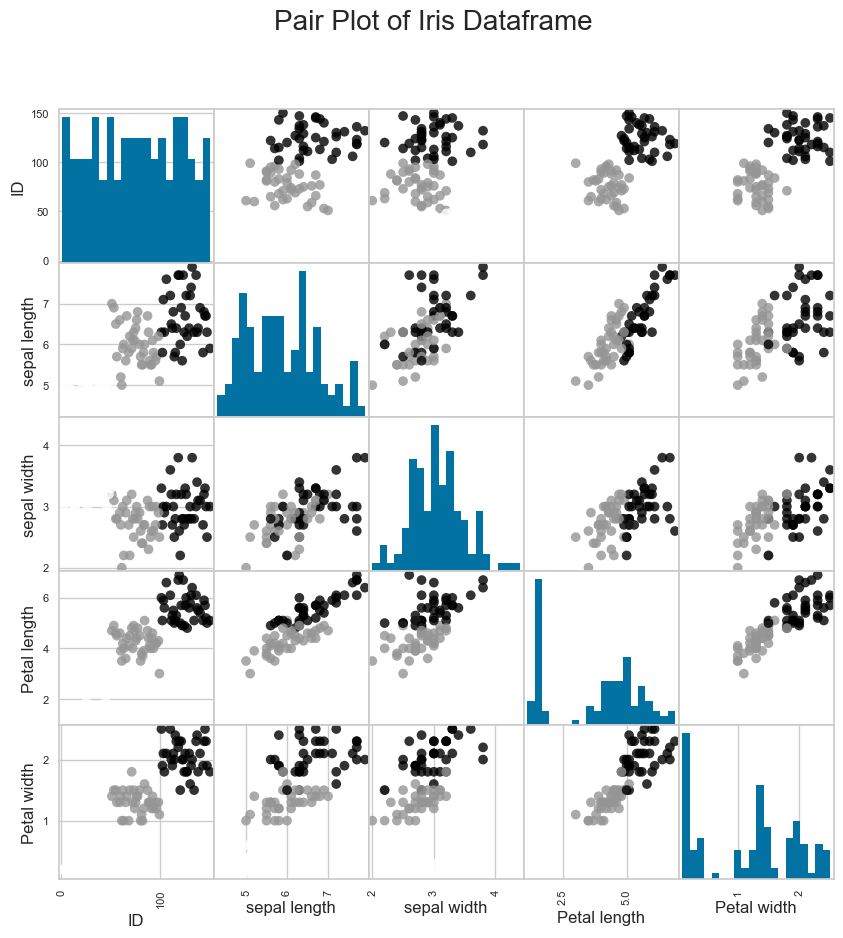

In [23]:
# Convert species names to numerical labels
label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train)

iris_dataframe = pd.DataFrame(data=X_train, columns=X_train.columns)
iris_sm = scatter_matrix(iris_dataframe, c=y_train_labels, figsize=(10, 10), alpha=0.8, marker='o', hist_kwds={'bins': 20})
plt.suptitle("Pair Plot of Iris Dataframe", size=20)
plt.show()

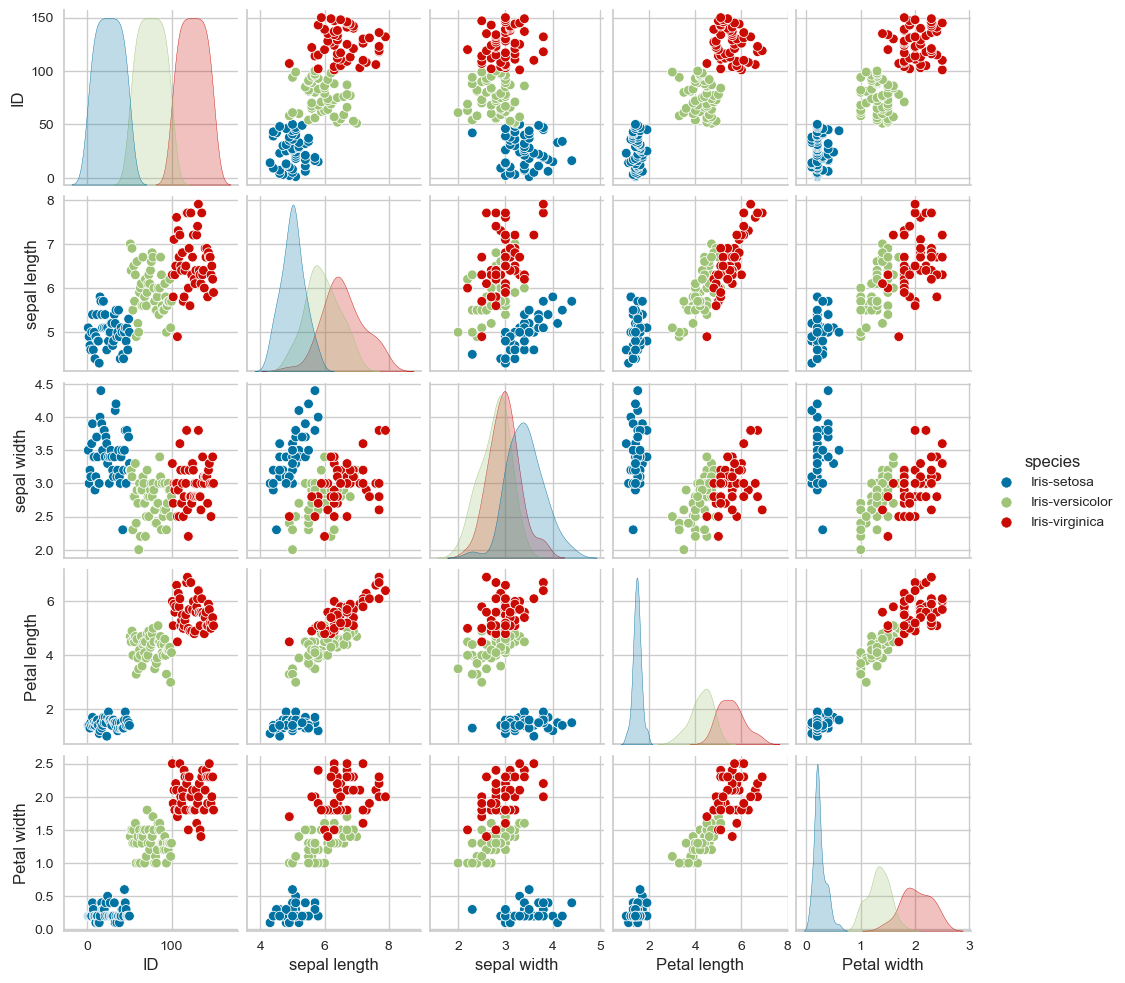

In [24]:
x_vars = list(data1.select_dtypes(include='number').columns)
y_vars = list(data1.select_dtypes(include='number').columns)
sns.pairplot(data1, hue = 'species', x_vars = x_vars, y_vars = y_vars, height = 2)

In [25]:
print("Keys of iris_dataset are:\n{}".format(data1.keys()))

Keys of iris_dataset are:
Index(['ID', 'sepal length', 'sepal width', 'Petal length', 'Petal width',
       'species'],
      dtype='object')


Text(0, 0.5, 'Frequency')

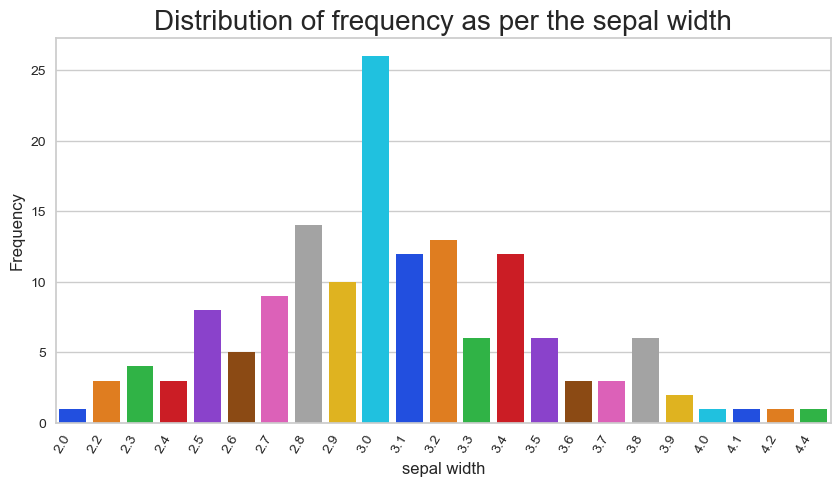

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sepal width',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the sepal width',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

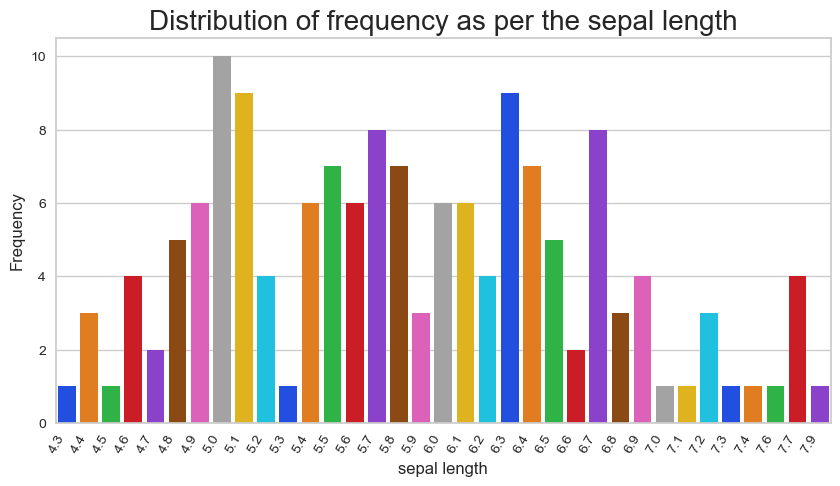

In [27]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sepal length',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the sepal length',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

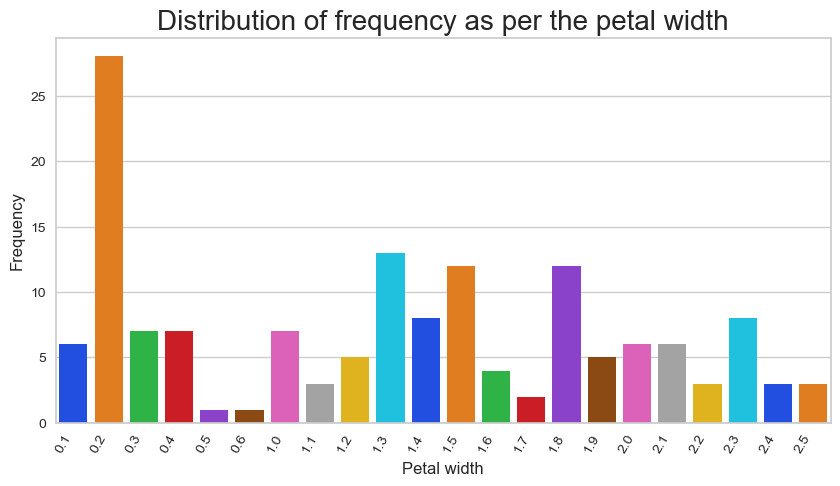

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Petal width',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the petal width',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

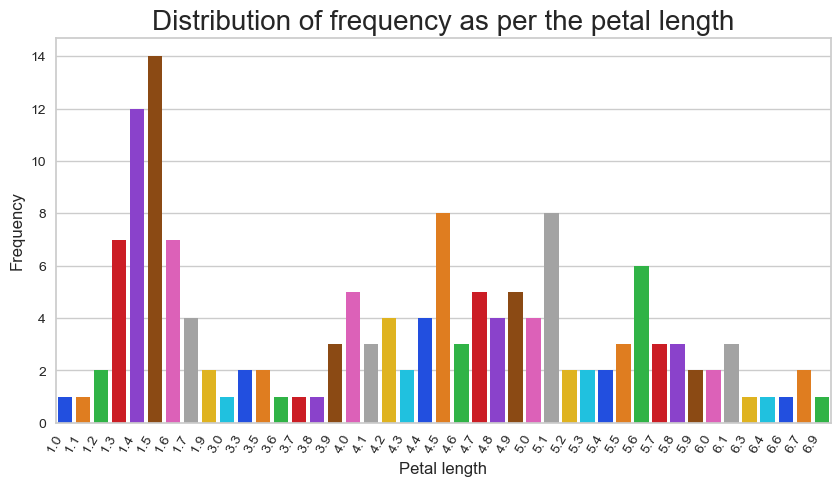

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Petal length',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the petal length',size=20)
plt.ylabel('Frequency')

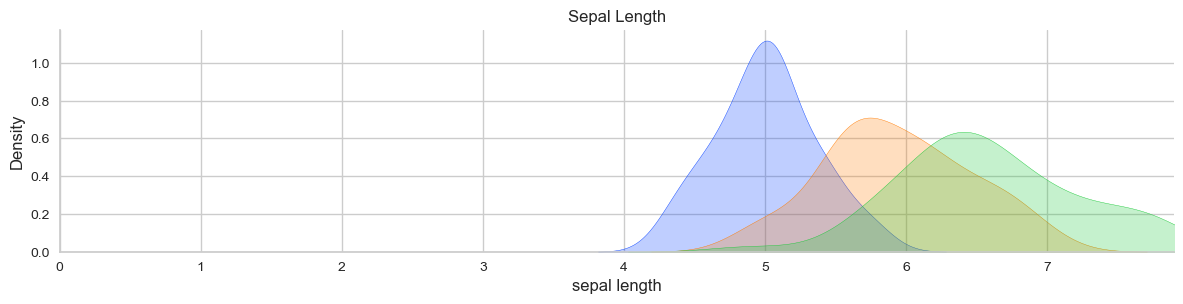

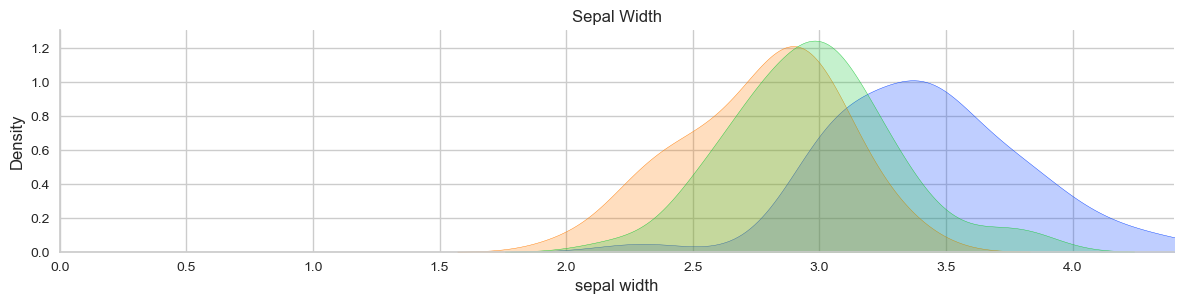

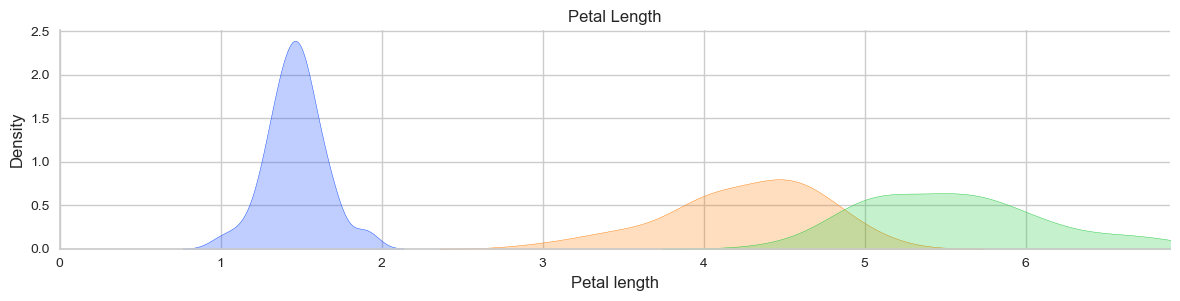

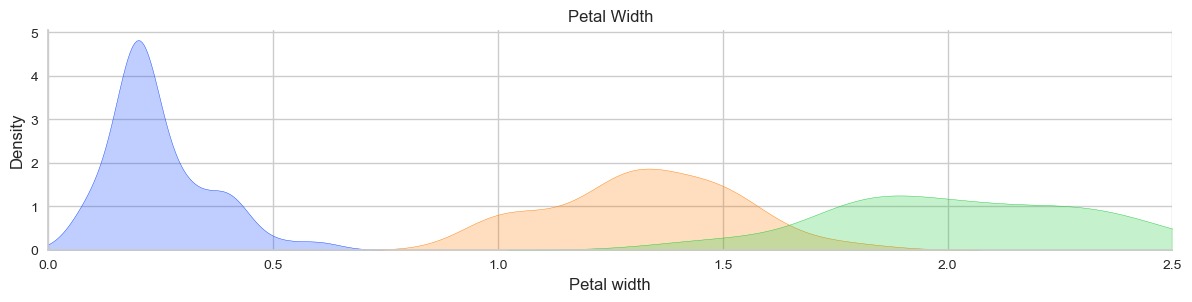

In [30]:
def plot_kde(a):
    facet=sns.FacetGrid(data1,hue='species',aspect=4,palette='bright')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,data1[a].max()))
    plt.title(a.title())
    plt.show()
warnings.filterwarnings('ignore')
plot_kde('sepal length')
plot_kde('sepal width')
plot_kde('Petal length')
plot_kde('Petal width')

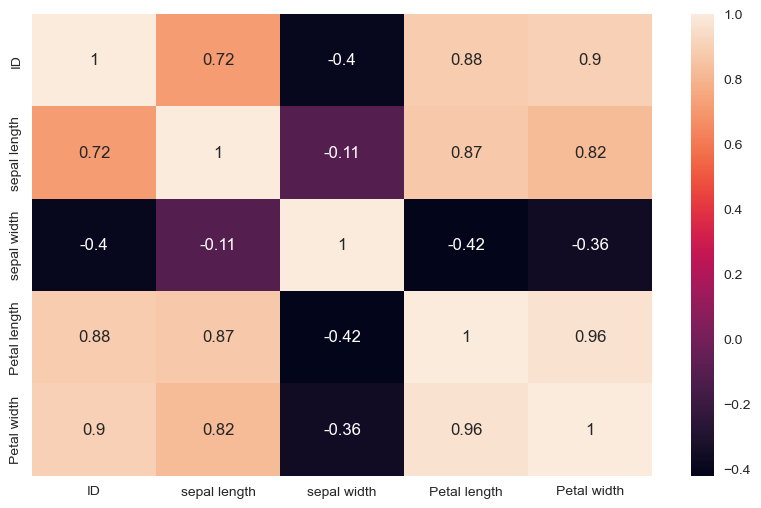

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),annot=True)
plt.show()

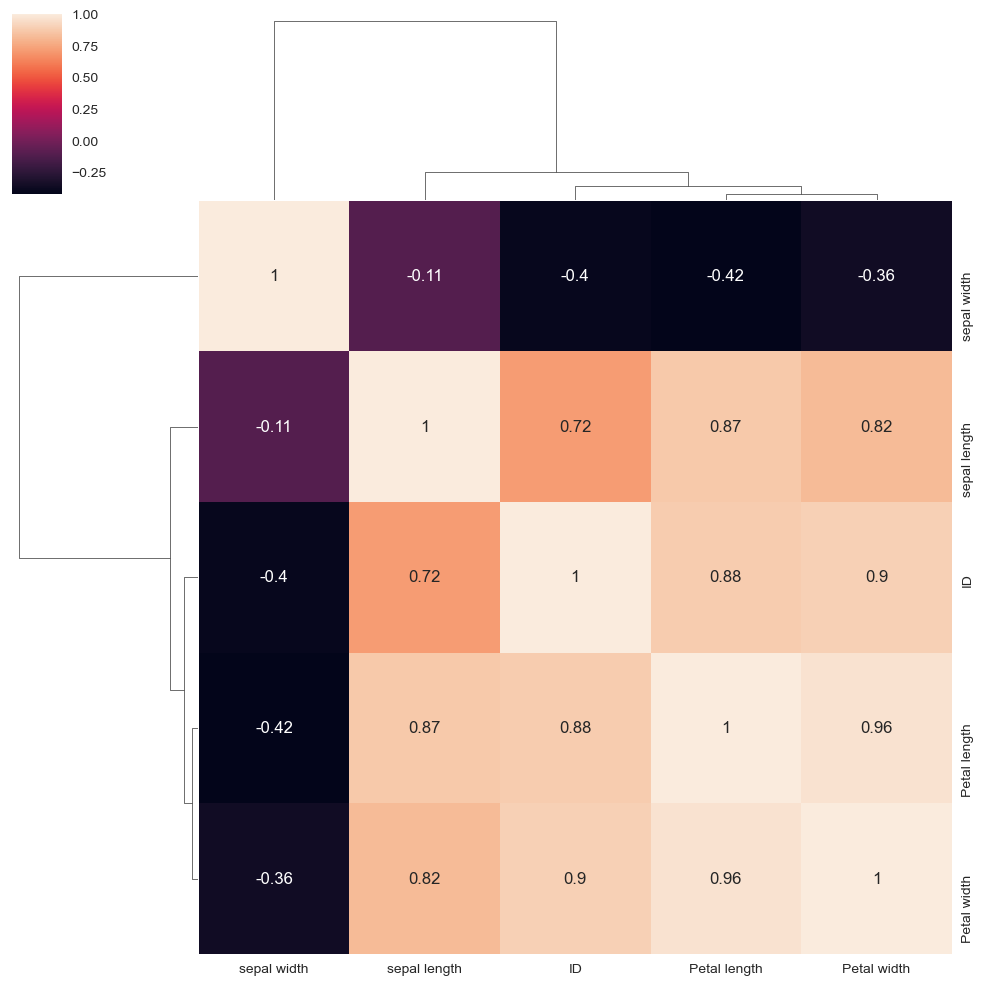

In [32]:
sns.clustermap(data1.corr(),annot=True)

**Training the Decision tree model**\
*Displays the accuracy and confusion matrix of the Decision tree model*\
*Heat map of the confusion matrix is also displayed for better visualization*

In [33]:
DT_Classifier = DecisionTreeClassifier()
DT_Classifier.fit(X_train,y_train)
y_pred = DT_Classifier.predict(X_train)
y_pred[:5]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

Training Data Set Accuracy:  1.0
Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9904273504273504
Validation Mean Accuracy:  0.990909090909091
Test dataset accuracy:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



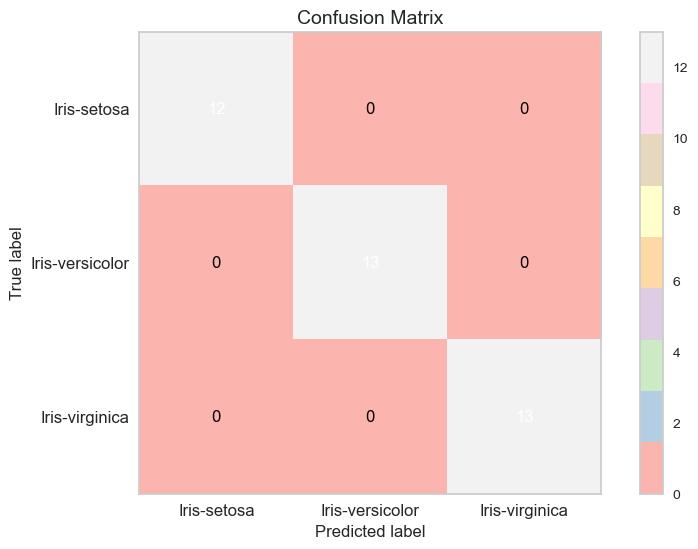

In [36]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Validation Mean F1 Score: ",cross_val_score(DT_Classifier,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(DT_Classifier,X_train,y_train,cv=5,scoring='accuracy').mean())
predictions = DT_Classifier.predict(X_test)
print("Test dataset accuracy: ", accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
skplt.metrics.plot_confusion_matrix(y_test, predictions,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

[Text(0.4, 0.8333333333333334, 'x[3] <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 100.0\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

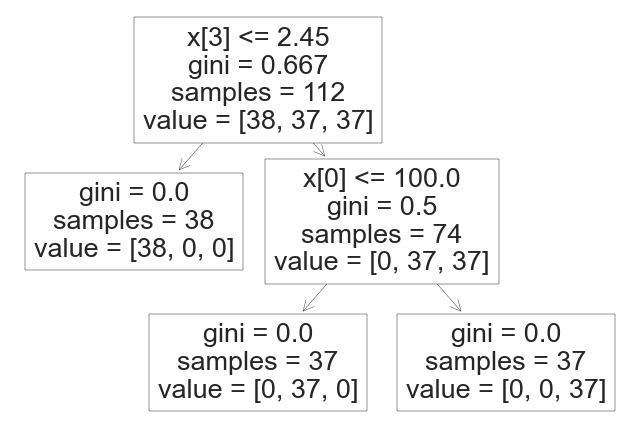

In [37]:
Classifier_tree = tree.DecisionTreeClassifier(max_depth = 3)
Classifier_tree.fit(X_train,y_train)
tree.plot_tree(Classifier_tree)

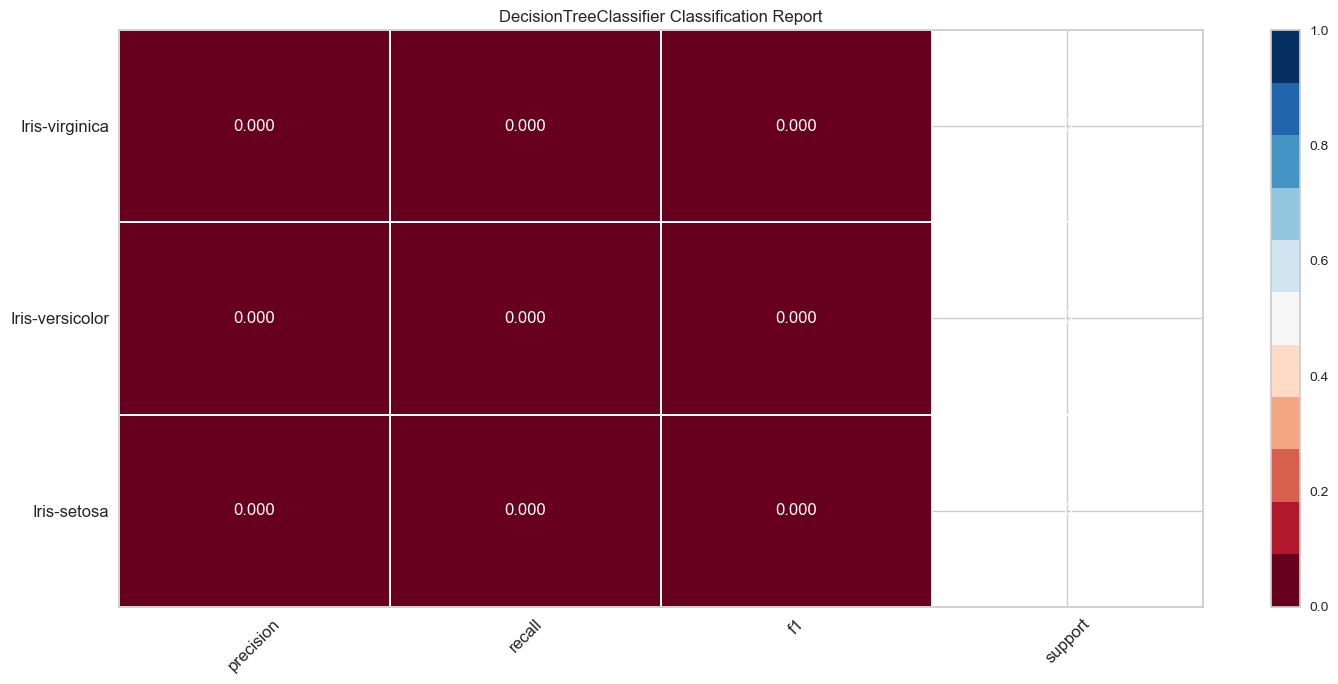

In [38]:
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(Classifier_tree, X_train, y_train, X_test, y_test,  support=True,cmap="RdBu")
visualizer.show()
plt.show()

**📊 Project Conclusion: 🌼**

*In this project, I embarked on a captivating journey into the realm of data classification using the Iris flower dataset. Leveraging the power of K-Nearest Neighbors (KNN), Random Forest Classifier, and Support Vector Classifier, I achieved remarkable accuracy rates:*

KNN Model Accuracy: 92.11%\
Random Forest Classifier Accuracy: 89.47%\
Support Vector Classifier Accuracy: 94.73%\
Each model demonstrated its unique strengths, contributing to the precision and reliability of our predictions. This project not only deepened our understanding of classification techniques but also unveiled the potential of data-driven insights in deciphering the world of flora. 🌿🌸